In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import plotly
import plotly.plotly as py
from plotly.graph_objs import *

In [6]:
plotly.tools.set_credentials_file(username='xinhe_peng', api_key='S1LLMwsKLPJLeUBBm1kF')
mapbox_access_token = 'pk.eyJ1IjoieGluaGUiLCJhIjoiY2oxdTMyNnM1MDAxbTJxdDQzY2w3bW9jMCJ9.1j5jgarfRGw8igGav3kJOw'

In [8]:
df=pd.read_csv('E:\\UIUC\\2017spring\\data visualization\\final\\DiscGrants96to13.csv',encoding='iso-8859-1')
df

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN
5,IA-00-00-0006-00,Hayward Area Historical Society Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,22701 Main Street,NaN,NaN,...,-122.089393,6.0,1.0,435400.0,3003.0,91260.0,33000.0,41860.0,36084.0,NaN
6,IA-00-00-0007-00,Sun Gallery,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1015 E Street,NaN,NaN,...,-122.089393,6.0,1.0,435400.0,3003.0,91260.0,33000.0,41860.0,36084.0,NaN
7,IA-00-00-0008-00,Coachella Valley Historical Society,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 595,NaN,NaN,...,-116.234704,6.0,65.0,45207.0,1000.0,90520.0,36448.0,40140.0,NaN,NaN
8,IA-00-00-0009-00,Los Gatos Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 1904,NaN,NaN,...,-121.984631,6.0,85.0,507001.0,2059.0,92830.0,44112.0,41940.0,NaN,NaN
9,IA-00-00-0010-00,Gold Nugget Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 949,NaN,NaN,...,-121.595628,6.0,7.0,1900.0,3002.0,92380.0,55520.0,17020.0,NaN,NaN


In [10]:
#df['Program Type'].unique()
count=df["ProgramType"].value_counts()
len(count)

17

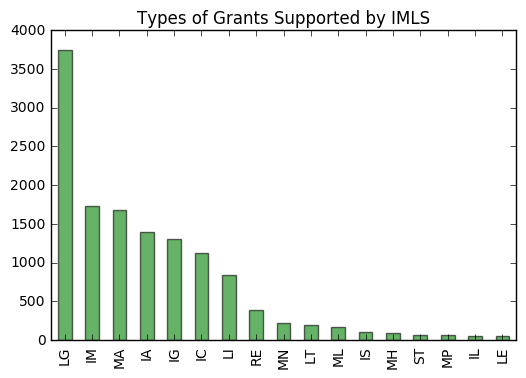

In [11]:
#plt.bar(np.arange(len(count),count,alpha=0.5)
df["ProgramType"].value_counts().plot(kind='bar',alpha=0.6,color='green',title='Types of Grants Supported by IMLS')

In [14]:
grant_lat = []
grant_lon = []
sizes=[]
colors = []
df['Text'] = df['Institution'] + '<br>' + df['Program'] + '<br>' + 'Program Type: ' + df['ProgramType'] + '<br>' + 'Total Award: ' + (df['AwardTotal']/1e3).astype(str)+ ' thousand'
dftext=[]
types=df['ProgramType'].unique()
scalecolor=['rgb(250,250,200)','rgb(250,250,100)','rgb(250,250,0)','rgb(250,200,250)','rgb(250,100,250)','rgb(250,0,250)','rgb(100,250,100)','rgb(0,100,0)','rgb(200,250,250)','rgb(100,250,250)','rgb(0,250,250)','rgb(0,0,200)','rgb(0,0,100)','rgb(0,200,0)','rgb(0,100,0)','rgb(200,0,0)','rgb(100,0,0)']
type=df['ProgramType'].unique()

for index in range(len(df)):
    grant_lat.append(df['Latitude'][index])
    grant_lon.append(df['Longitude'][index])
    sizes.append(df['AwardTotal'][index]/200000+5)
    dftext.append(df['Text'][index])
    for t in range(len(type)):
        if df['ProgramType'][index] == type[t]:
            colors.append(scalecolor[t])



data = Data([
    Scattermapbox(
        lat=grant_lat,
        lon=grant_lon,
        marker=Marker(
            size=sizes,
            color=colors,
        ),
        text=dftext,
        hoverinfo='text',
        showlegend=False
    )
])
        
layout = Layout(
    title='Administrative Discretionary Grants and Types<br>(zoom in or out of a diagram via mouse wheel)',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    )
)

fig=dict(data=data, layout=layout)
py.iplot(fig, filename='590DV part2 Map of Grants')

In [15]:
df2 = pd.read_csv('E:\\UIUC\\2017spring\\data visualization\\final\\GDP by State.csv')
code = pd.read_csv('E:\\UIUC\\2017spring\\data visualization\\final\\us_states.csv')
sub_df2=pd.merge(df2,code,left_on='Area',right_on='States')
sub_df2['text'] = sub_df2['Area']+'<br>'+'GDP: '+(sub_df2['2015'] .astype(str))

In [20]:
for col in sub_df2.columns:
    sub_df2[col] = sub_df2[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]



data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = sub_df2['Abbreviations'],
        locationmode = 'USA-states',
        z = sub_df2['2015'].astype(float),
        text = sub_df2['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Million USD")
        ) ]

layout = dict(
        title = 'The GDP of US by States(million of current dollars)<br>(move mouse on each state to check the details)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='590DV part2 Map of GDP' )